In [81]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [82]:
from gmdhpy.gmdh import Regressor

In [83]:
from sklearn.metrics import mean_absolute_error, r2_score

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_predictions1(test, predicted):
    sns.set(style="whitegrid", font_scale=1.2)  # Set the style and font scale

    plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

    # Plotting the actual values
    sns.lineplot(data=test, color='red', linewidth=2, label='Real SPI')

    # Plotting the predicted values
    sns.lineplot(data=predicted, color='blue', linewidth=2, label='Predicted SPI')

    # Customizing the plot
    plt.title('SPI Value Prediction', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SPI', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adding eye-catching elements
    plt.fill_between(range(len(test)), test, predicted, color='gray', alpha=0.2)
    plt.axvline(x=50, color='green', linestyle='--', linewidth=1.5)
    plt.text(50, max(test), 'Prediction Start', color='green', fontsize=12)

    # Adjusting the plot appearance
    sns.despine()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [85]:
import matplotlib.pyplot as plt

def plot_predictions2(test, predicted):
    plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

    # Plotting the actual values
    plt.plot(test, color='red', linewidth=1.5, label='Real SPI')

    # Plotting the predicted values
    plt.plot(predicted, color='blue', linewidth=1.5, label='Predicted SPI')

    # Customizing the plot
    plt.title('SPI Value Prediction', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SPI', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adding eye-catching elements
    plt.fill_between(range(len(test)), test, predicted, color='gray', alpha=0.2)
    plt.axvline(x=50, color='green', linestyle='--', linewidth=1.5)
    plt.text(50, max(test), 'Prediction Start', color='green', fontsize=12)

    # Adjusting the plot appearance
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [86]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real SPI')
    plt.plot(predicted, color='blue',label='Predicted SPI')
    plt.title('SPI Value Prediction')
    plt.xlabel('Time')
    plt.ylabel('SPI')
    plt.legend()
    plt.figure(figsize=(16,4))
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    print("The MSE is {}".format(mean_squared_error(test, predicted)))
    print("The MAE is {}".format(mean_absolute_error(test, predicted)))
    print("The R2_Score is {}".format(r2_score(test, predicted)))

In [110]:
# First, we get the data
dataset = pd.read_csv(r"wavelet_kesinga.csv")
dataset.head()

,spi,Approximation,D 1,D 2,D 3,D 4,D 5,D 6
0,-1.54,-0.09,0.62,0.17,-0.34,-0.59,0.16,-0.26
1,-1.54,-0.08,-0.65,0.55,-0.37,-0.45,0.12,-0.31
2,-1.20,-0.07,-0.33,0.99,-0.44,-0.29,0.08,-0.37
3,0.15,-0.06,-0.38,0.71,-0.38,-0.10,0.10,-0.41
4,1.20,-0.05,0.01,-0.42,-0.25,0.03,0.14,-0.42


In [111]:
X = dataset[['Approximation','D 2', 'D 3', 'D 6']].values  # Select the desired features
y = dataset.iloc[:, 0].values  # Target variable (SPI)


In [112]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [113]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create separate variables for the combined datasets
training_set = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
test_set = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
training_set

array([[-0.06,  0.37, -0.61,  0.08, -0.92],
       [ 0.03,  0.04, -0.13,  0.02,  0.79],
       [ 0.25,  0.42, -0.47,  0.02,  0.15],
       ...,
       [-0.13,  0.44, -0.21, -0.17, -0.92],
       [ 0.28,  0.07, -0.69,  0.02, -2.44],
       [ 0.05,  0.08, -0.55,  0.23,  0.49]])

In [114]:
# # Checking for missing values
# training_set = dataset[:'2016'].iloc[:,1:2].values
# test_set = dataset['2017':].iloc[:,1:2].values

In [115]:
# # We have chosen 'High' attribute for prices. Let's see what it looks like
# dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
# dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
# plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
# plt.title('CSCO stock price')
# plt.show()

In [116]:
# # Scaling the training set
# sc = MinMaxScaler(feature_range=(0,1))
# training_set_scaled = sc.fit_transform(training_set)
# # print(training_set_scaled.shape)
# print(training_set.shape)
# print(test_set.shape)

In [117]:
# X_train = []
# y_train = []
# for i in range(60,training_set.shape[0]):
#     X_train.append(training_set[i-20:i,0])
#     y_train.append(training_set[i,0])
# X_train, y_train = np.array(X_train), np.array(y_train)
# print(X_train.shape)
# print(y_train.shape)

In [130]:
gmdh = Regressor(ref_functions=('cubic','quadratic','linear','linear_cov'),
                      criterion_type='validate',
                      criterion_minimum_width=4,
                      stop_train_epsilon_condition=0.01,
                      layer_err_criterion='top',
                      l2=0.6,
                      verbose=1,
                      n_jobs='max')

In [131]:
# # Now to get the test set ready in a similar way as the training set.
# # The following has been done so first 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# # 'High' attribute data for processing
# # dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
# inputs = X_train
# # print(inputs.shape)
# inputs = inputs.reshape(-1,1)
# print(inputs.shape)

# # print(inputs.shape)
# # inputs  = sc.transform(inputs)
# # print(inputs.shape)
# print(X_test.shape)

In [120]:
# Preparing X_test and predicting the prices
# X_test = []
# y_test = []
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-20:i,0])
#     y_test.append(inputs[i,0])
# X_test, y_test = np.array(X_test), np.array(y_test)
# print(X_test.shape)
# print(y_test.shape)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(392, 4)
(392,)
(98, 4)
(98,)


In [132]:
gmdh.fit(X_train,y_train)

train layer0 in 17.95 sec
train layer1 in 0.15 sec
train layer2 in 0.13 sec


In [133]:
final_predictions = gmdh.predict(X_test)
print(final_predictions.shape)
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price.reshape(-1,1)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(98,)


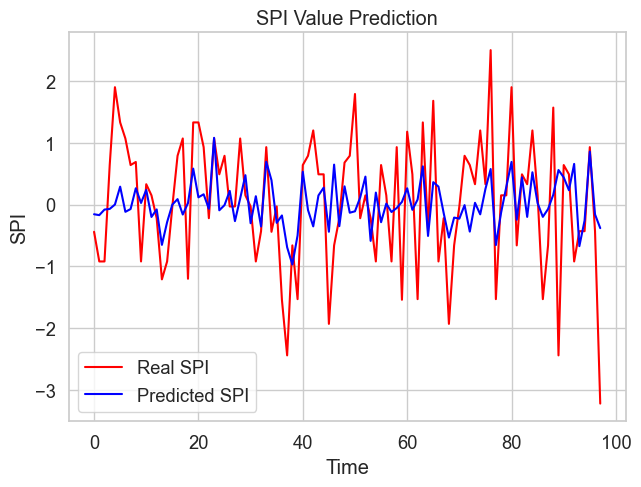

<Figure size 1600x400 with 0 Axes>

In [134]:
plot_predictions(y_test,final_predictions)

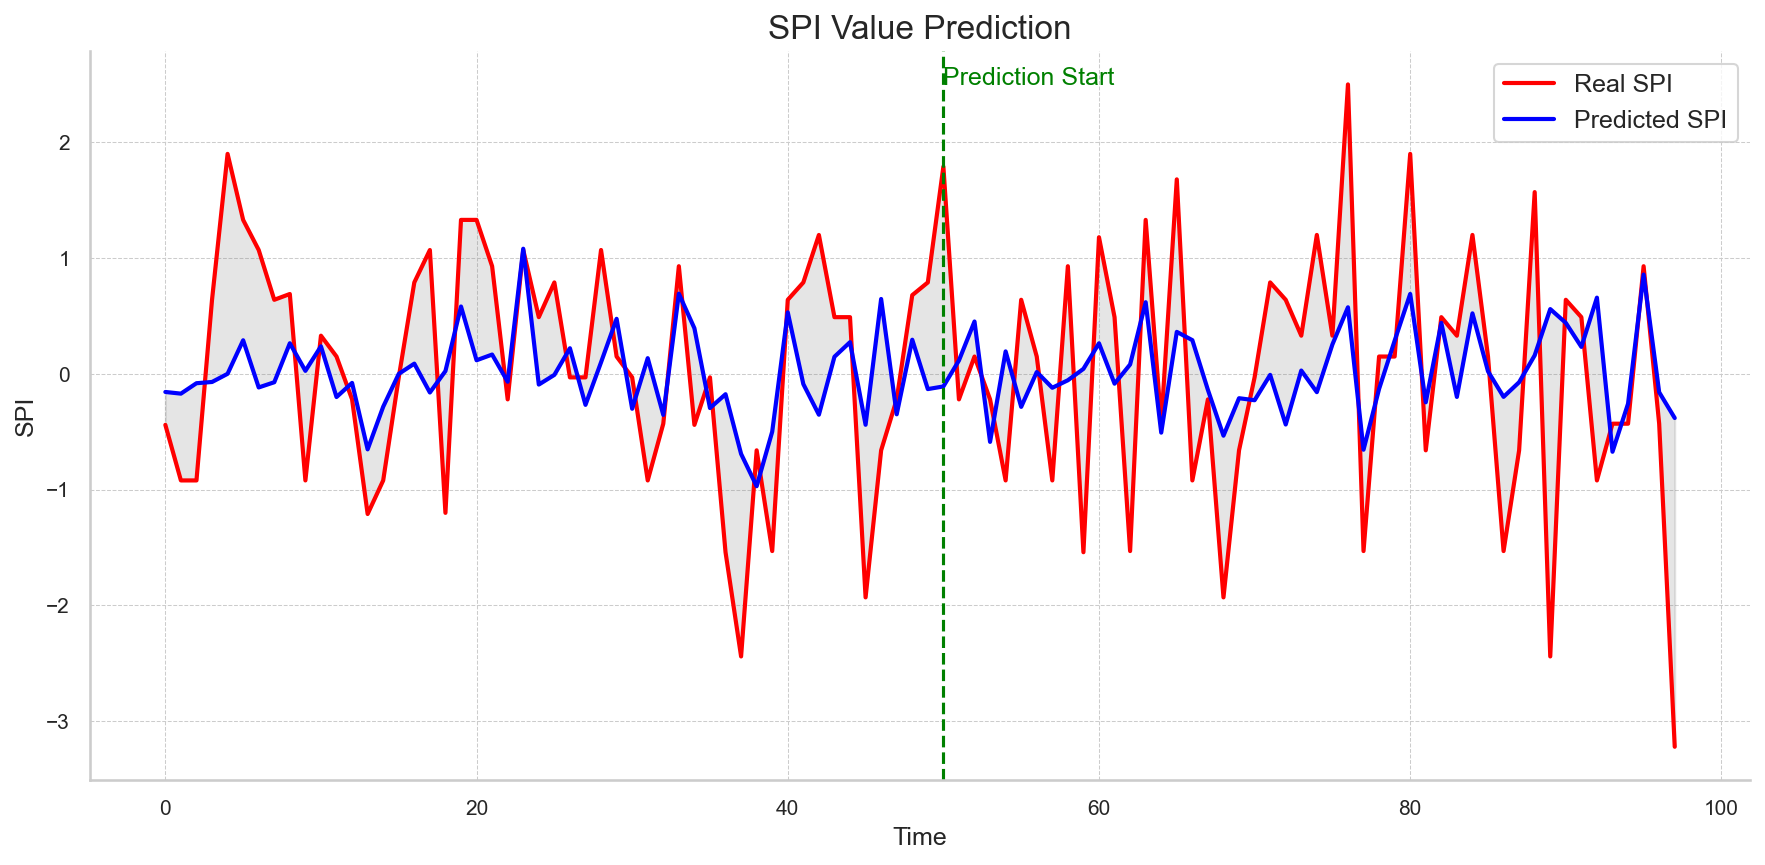

In [135]:
plot_predictions1(y_test,final_predictions)

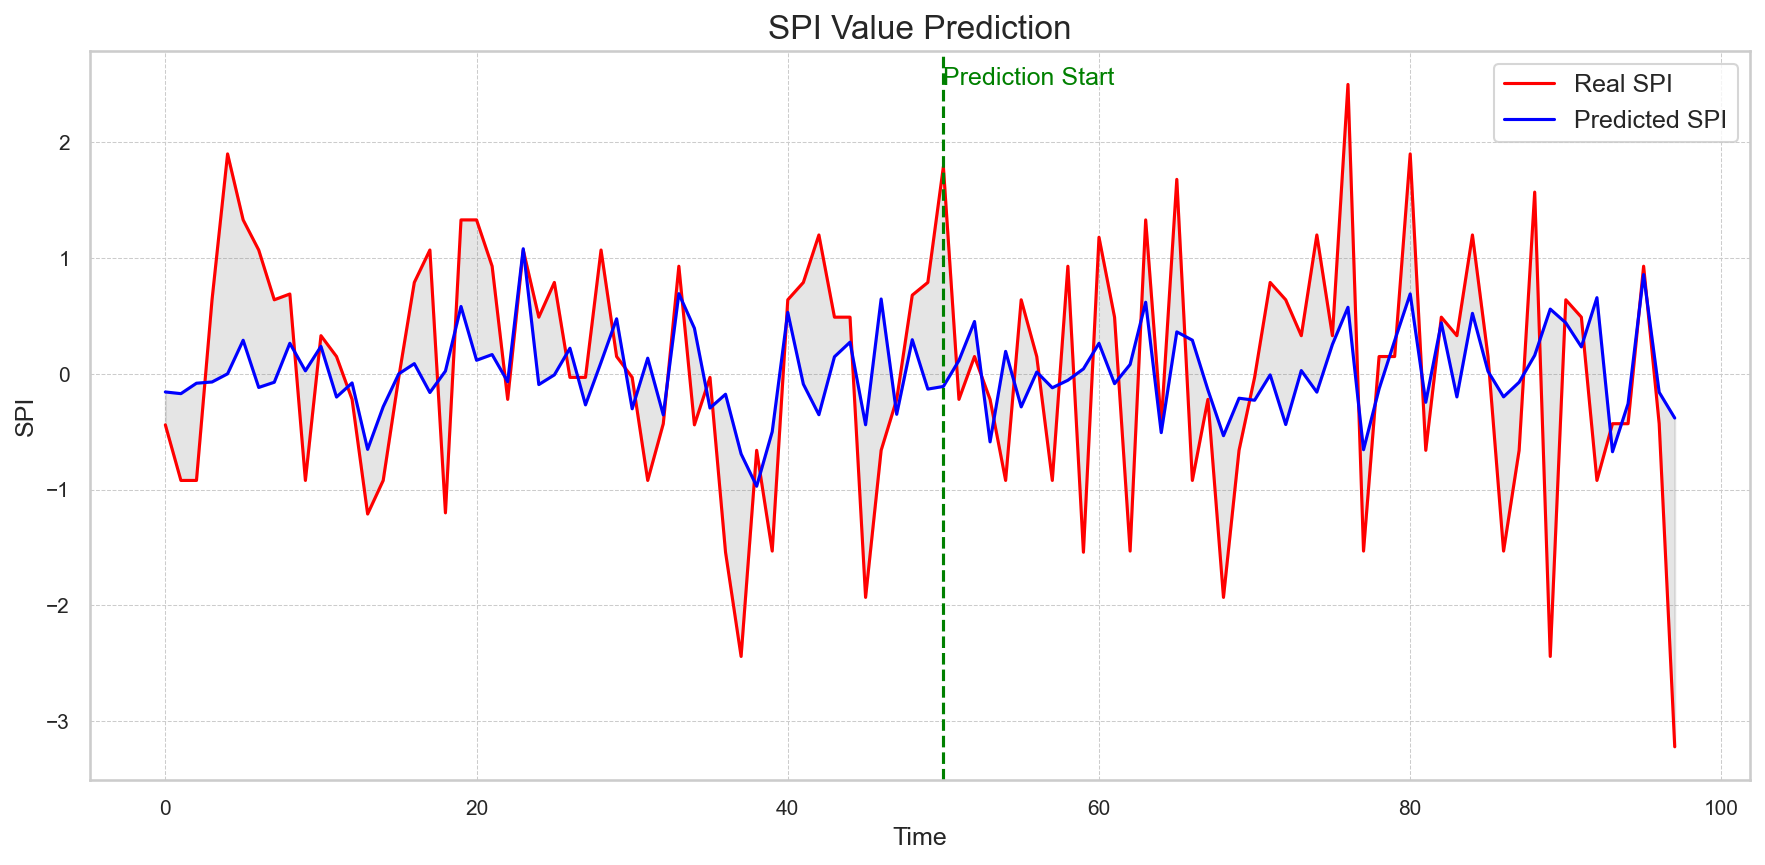

In [136]:
plot_predictions2(y_test,final_predictions)

In [137]:
return_rmse(y_test,final_predictions)

The root mean squared error is 0.9559715298743516.
The MSE is 0.9138815659303083
The MAE is 0.7460989809790489
The R2_Score is 0.18056815067540422


In [138]:
from sklearn.metrics import r2_score
y_test, final_predictions = list(y_test),list(final_predictions)
# gmdh.score(y_test, predicted_stock_price)
r2_score(y_test, final_predictions)

0.18056815067540422

In [139]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [140]:
evaluation_metrics = calculate_evaluation_metrics(y_test, final_predictions)
print(evaluation_metrics)


{'ME': 0.028602957417122443, 'MAE': 0.7460989809790489, 'MSE': 0.9138815659303083, 'RMSE': 0.9559715298743516, 'NRMSE': 0.16712788983817334, 'PBIAS': 66.2668989805673, 'RSR': 0.9052247507247003, 'rSD': 0.9048194703102047, 'NSE': 0.18056815067540422, 'mNSE': 0.18056815067540422, 'rNSE': 0.16190642108690073, 'd': 0.49964728480896303, 'md': 0.49964728480896303, 'rd': 0.49964728480896303, 'cp': 0.49964728480896303, 'r': 0.49964728480896303, 'R2': 0.18056815067540422}


In [63]:
k=11
print(y_test[k],final_predictions[k])


0.15 -0.22616722831992592


In [64]:
# # Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# # So for each element of training set, we have 60 previous training set elements 
# X_train = []
# y_train = []
# for i in range(60,2769):
#     X_train.append(training_set_scaled[i-60:i,0])
#     y_train.append(training_set_scaled[i,0])
# X_train, y_train = np.array(X_train), np.array(y_train)

In [65]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [66]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=900,batch_size=32)

Epoch 1/900
13/13 [==============================] - 34s 15ms/step - loss: 0.9721
Epoch 2/900
13/13 [==============================] - 0s 16ms/step - loss: 0.9722
Epoch 3/900
13/13 [==============================] - 0s 19ms/step - loss: 0.9710
Epoch 4/900
13/13 [==============================] - 0s 16ms/step - loss: 0.9711
Epoch 5/900
13/13 [==============================] - 0s 17ms/step - loss: 0.9701
Epoch 6/900
13/13 [==============================] - 0s 17ms/step - loss: 0.9713
Epoch 7/900
13/13 [==============================] - 0s 17ms/step - loss: 0.9720
Epoch 8/900
13/13 [==============================] - 0s 15ms/step - loss: 0.9705
Epoch 9/900
13/13 [==============================] - 0s 19ms/step - loss: 0.9718
Epoch 10/900
13/13 [==============================] - 0s 18ms/step - loss: 0.9720
Epoch 11/900
13/13 [==============================] - 0s 18ms/step - loss: 0.9697
Epoch 12/900
13/13 [==============================] - 0s 17ms/step - loss: 0.9707
Epoch 13/900
13/13 [====

Epoch 101/900
13/13 [==============================] - 0s 17ms/step - loss: 0.8271
Epoch 102/900
13/13 [==============================] - 0s 17ms/step - loss: 0.8300
Epoch 103/900
13/13 [==============================] - 0s 23ms/step - loss: 0.8352
Epoch 104/900
13/13 [==============================] - 0s 18ms/step - loss: 0.8143
Epoch 105/900
13/13 [==============================] - 0s 17ms/step - loss: 0.8287
Epoch 106/900
13/13 [==============================] - 0s 16ms/step - loss: 0.8225
Epoch 107/900
13/13 [==============================] - 0s 19ms/step - loss: 0.8207
Epoch 108/900
13/13 [==============================] - 0s 16ms/step - loss: 0.8309
Epoch 109/900
13/13 [==============================] - 0s 16ms/step - loss: 0.8274
Epoch 110/900
13/13 [==============================] - 0s 20ms/step - loss: 0.8230
Epoch 111/900
13/13 [==============================] - 0s 16ms/step - loss: 0.8308
Epoch 112/900
13/13 [==============================] - 0s 15ms/step - loss: 0.8246
Epoc

13/13 [==============================] - 0s 21ms/step - loss: 0.8032
Epoch 200/900
13/13 [==============================] - 0s 21ms/step - loss: 0.7914
Epoch 201/900
13/13 [==============================] - 0s 20ms/step - loss: 0.8203
Epoch 202/900
13/13 [==============================] - 0s 19ms/step - loss: 0.7981
Epoch 203/900
13/13 [==============================] - 0s 20ms/step - loss: 0.8090
Epoch 204/900
13/13 [==============================] - 0s 19ms/step - loss: 0.8041
Epoch 205/900
13/13 [==============================] - 0s 18ms/step - loss: 0.7942
Epoch 206/900
13/13 [==============================] - 0s 22ms/step - loss: 0.8015
Epoch 207/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7941
Epoch 208/900
13/13 [==============================] - 0s 18ms/step - loss: 0.7948
Epoch 209/900
13/13 [==============================] - 0s 17ms/step - loss: 0.8038
Epoch 210/900
13/13 [==============================] - 0s 23ms/step - loss: 0.8026
Epoch 211/900
13/1

13/13 [==============================] - 0s 27ms/step - loss: 0.7774
Epoch 298/900
13/13 [==============================] - 0s 25ms/step - loss: 0.7795
Epoch 299/900
13/13 [==============================] - 0s 26ms/step - loss: 0.7606
Epoch 300/900
13/13 [==============================] - 0s 25ms/step - loss: 0.7766
Epoch 301/900
13/13 [==============================] - 0s 25ms/step - loss: 0.7655
Epoch 302/900
13/13 [==============================] - 0s 28ms/step - loss: 0.7824
Epoch 303/900
13/13 [==============================] - 0s 27ms/step - loss: 0.7636
Epoch 304/900
13/13 [==============================] - 0s 25ms/step - loss: 0.7861
Epoch 305/900
13/13 [==============================] - 0s 24ms/step - loss: 0.7763
Epoch 306/900
13/13 [==============================] - 0s 24ms/step - loss: 0.7625
Epoch 307/900
13/13 [==============================] - 0s 22ms/step - loss: 0.7749
Epoch 308/900
13/13 [==============================] - 0s 25ms/step - loss: 0.7700
Epoch 309/900
13/1

13/13 [==============================] - 0s 16ms/step - loss: 0.7647
Epoch 396/900
13/13 [==============================] - 0s 16ms/step - loss: 0.7470
Epoch 397/900
13/13 [==============================] - 0s 18ms/step - loss: 0.7525
Epoch 398/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7555
Epoch 399/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7652
Epoch 400/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7593
Epoch 401/900
13/13 [==============================] - 0s 16ms/step - loss: 0.7792
Epoch 402/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7593
Epoch 403/900
13/13 [==============================] - 0s 16ms/step - loss: 0.7645
Epoch 404/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7590
Epoch 405/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7686
Epoch 406/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7640
Epoch 407/900
13/1

13/13 [==============================] - 0s 31ms/step - loss: 0.6970
Epoch 494/900
13/13 [==============================] - 0s 26ms/step - loss: 0.7228
Epoch 495/900
13/13 [==============================] - 0s 21ms/step - loss: 0.7066
Epoch 496/900
13/13 [==============================] - 0s 19ms/step - loss: 0.7111
Epoch 497/900
13/13 [==============================] - 0s 22ms/step - loss: 0.6860
Epoch 498/900
13/13 [==============================] - 0s 24ms/step - loss: 0.7058
Epoch 499/900
13/13 [==============================] - 0s 20ms/step - loss: 0.6921
Epoch 500/900
13/13 [==============================] - 0s 17ms/step - loss: 0.7013
Epoch 501/900
13/13 [==============================] - 0s 20ms/step - loss: 0.7054
Epoch 502/900
13/13 [==============================] - 0s 18ms/step - loss: 0.6870
Epoch 503/900
13/13 [==============================] - 0s 18ms/step - loss: 0.6936
Epoch 504/900
13/13 [==============================] - 0s 16ms/step - loss: 0.6968
Epoch 505/900
13/1

13/13 [==============================] - 0s 19ms/step - loss: 0.6363
Epoch 592/900
13/13 [==============================] - 0s 17ms/step - loss: 0.5875
Epoch 593/900
13/13 [==============================] - 0s 19ms/step - loss: 0.5935
Epoch 594/900
13/13 [==============================] - 0s 18ms/step - loss: 0.5822
Epoch 595/900
13/13 [==============================] - 0s 15ms/step - loss: 0.6070
Epoch 596/900
13/13 [==============================] - 0s 16ms/step - loss: 0.6502
Epoch 597/900
13/13 [==============================] - 0s 16ms/step - loss: 0.5991
Epoch 598/900
13/13 [==============================] - 0s 17ms/step - loss: 0.6184
Epoch 599/900
13/13 [==============================] - 0s 18ms/step - loss: 0.6112
Epoch 600/900
13/13 [==============================] - 0s 18ms/step - loss: 0.6203
Epoch 601/900
13/13 [==============================] - 0s 18ms/step - loss: 0.6223
Epoch 602/900
13/13 [==============================] - 0s 22ms/step - loss: 0.6179
Epoch 603/900
13/1

13/13 [==============================] - 0s 18ms/step - loss: 0.5183
Epoch 690/900
13/13 [==============================] - 0s 20ms/step - loss: 0.5154
Epoch 691/900
13/13 [==============================] - 0s 16ms/step - loss: 0.5198
Epoch 692/900
13/13 [==============================] - 0s 20ms/step - loss: 0.5324
Epoch 693/900
13/13 [==============================] - 0s 16ms/step - loss: 0.5205
Epoch 694/900
13/13 [==============================] - 0s 18ms/step - loss: 0.5271
Epoch 695/900
13/13 [==============================] - 0s 18ms/step - loss: 0.5101
Epoch 696/900
13/13 [==============================] - 0s 16ms/step - loss: 0.5464
Epoch 697/900
13/13 [==============================] - 0s 15ms/step - loss: 0.5006
Epoch 698/900
13/13 [==============================] - 0s 18ms/step - loss: 0.5263
Epoch 699/900
13/13 [==============================] - 0s 18ms/step - loss: 0.4914
Epoch 700/900
13/13 [==============================] - 0s 19ms/step - loss: 0.4898
Epoch 701/900
13/1

13/13 [==============================] - 0s 21ms/step - loss: 0.4970
Epoch 788/900
13/13 [==============================] - 0s 19ms/step - loss: 0.4657
Epoch 789/900
13/13 [==============================] - 0s 18ms/step - loss: 0.4380
Epoch 790/900
13/13 [==============================] - 0s 19ms/step - loss: 0.4364
Epoch 791/900
13/13 [==============================] - 0s 18ms/step - loss: 0.4530
Epoch 792/900
13/13 [==============================] - 0s 16ms/step - loss: 0.4391
Epoch 793/900
13/13 [==============================] - 0s 18ms/step - loss: 0.4407
Epoch 794/900
13/13 [==============================] - 0s 19ms/step - loss: 0.4533
Epoch 795/900
13/13 [==============================] - 0s 22ms/step - loss: 0.4711
Epoch 796/900
13/13 [==============================] - 0s 19ms/step - loss: 0.4234
Epoch 797/900
13/13 [==============================] - 0s 19ms/step - loss: 0.4687
Epoch 798/900
13/13 [==============================] - 0s 18ms/step - loss: 0.4342
Epoch 799/900
13/1

13/13 [==============================] - 0s 17ms/step - loss: 0.3983
Epoch 886/900
13/13 [==============================] - 0s 16ms/step - loss: 0.3889
Epoch 887/900
13/13 [==============================] - 0s 17ms/step - loss: 0.3713
Epoch 888/900
13/13 [==============================] - 0s 16ms/step - loss: 0.3730
Epoch 889/900
13/13 [==============================] - 0s 16ms/step - loss: 0.3700
Epoch 890/900
13/13 [==============================] - 0s 16ms/step - loss: 0.3649
Epoch 891/900
13/13 [==============================] - 0s 17ms/step - loss: 0.3830
Epoch 892/900
13/13 [==============================] - 0s 16ms/step - loss: 0.3552
Epoch 893/900
13/13 [==============================] - 0s 16ms/step - loss: 0.3961
Epoch 894/900
13/13 [==============================] - 0s 16ms/step - loss: 0.3870
Epoch 895/900
13/13 [==============================] - 0s 15ms/step - loss: 0.3482
Epoch 896/900
13/13 [==============================] - 0s 15ms/step - loss: 0.3862
Epoch 897/900
13/1

In [67]:
# # Now to get the test set ready in a similar way as the training set.
# # The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# # 'High' attribute data for processing
# dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
# inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs  = sc.transform(inputs)

In [68]:
# # Preparing X_test and predicting the prices
# X_test = []
# for i in range(60,311):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [69]:
predicted_spi = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_spi

4/4 [==============================] - 5s 9ms/step


array([[ 0.16686383],
       [ 0.05437347],
       [-1.8501991 ],
       [ 0.01590922],
       [-0.40185282],
       [ 0.4876672 ],
       [ 0.59189767],
       [ 0.15116633],
       [ 0.4323054 ],
       [ 2.1636028 ],
       [-0.7077369 ],
       [-0.1341772 ],
       [ 0.37854102],
       [-1.4829491 ],
       [-0.44278985],
       [ 0.632719  ],
       [ 0.49197984],
       [-0.25405172],
       [ 0.8961272 ],
       [ 0.84189445],
       [-0.14338787],
       [ 1.1281205 ],
       [-1.7147698 ],
       [ 0.9933636 ],
       [ 0.26288307],
       [-0.51420045],
       [ 0.40128878],
       [-1.2255268 ],
       [ 0.15684152],
       [-0.01048458],
       [ 0.272599  ],
       [-0.8398935 ],
       [-0.40207976],
       [ 0.04413766],
       [ 0.19949648],
       [-0.5387584 ],
       [ 0.00438645],
       [-0.5251619 ],
       [-0.47725362],
       [ 0.16112131],
       [ 0.5444117 ],
       [ 0.8057862 ],
       [-0.58136195],
       [ 0.18109122],
       [ 1.7683468 ],
       [-0

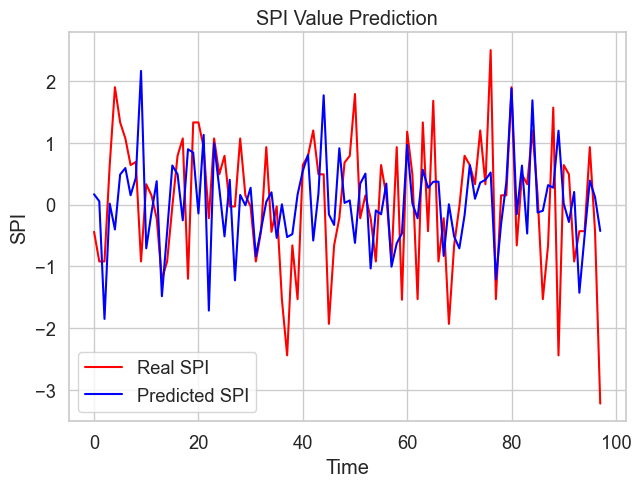

<Figure size 1600x400 with 0 Axes>

In [70]:
# Visualizing the results for LSTM
plot_predictions(y_test,predicted_spi)

In [71]:
# Evaluating our model
return_rmse(y_test,predicted_spi)

The root mean squared error is 1.090511419654292.
The MSE is 1.1892151563964193
The MAE is 0.8335600567358185
The R2_Score is -0.06630969611336823


In [72]:
evaluation_metrics = calculate_evaluation_metrics(y_test, predicted_spi)
print(evaluation_metrics)

{'ME': 0.0037299087225478723, 'MAE': 0.8335600567358185, 'MSE': 1.1892151563964193, 'RMSE': 1.090511419654292, 'NRMSE': 0.19064884958991116, 'PBIAS': 8.641396094791729, 'RSR': 1.0326227269014412, 'rSD': 1.2052416066401372, 'NSE': -141.35674086715343, 'mNSE': -141.35674086715343, 'rNSE': -126.74751291799494, 'd': 0.3577256971737569, 'md': 0.3577256971737569, 'rd': 0.3577256971737569, 'cp': 0.3577256971737569, 'r': 0.3577256971737569, 'R2': -0.06630969611336823}


Truth be told. That's one awesome score. 

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [73]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=1200,batch_size=32)

Epoch 1/1200


C:\Users\asitg\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


13/13 [==============================] - 25s 14ms/step - loss: 0.9880
Epoch 2/1200
13/13 [==============================] - 0s 24ms/step - loss: 0.9880
Epoch 3/1200
13/13 [==============================] - 0s 22ms/step - loss: 0.9792
Epoch 4/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.9870
Epoch 5/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.9955
Epoch 6/1200
13/13 [==============================] - 0s 28ms/step - loss: 1.0316
Epoch 7/1200
13/13 [==============================] - 0s 22ms/step - loss: 0.9951
Epoch 8/1200
13/13 [==============================] - 0s 23ms/step - loss: 0.9727
Epoch 9/1200
13/13 [==============================] - 0s 22ms/step - loss: 0.9781
Epoch 10/1200
13/13 [==============================] - 0s 25ms/step - loss: 0.9746
Epoch 11/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.9903
Epoch 12/1200
13/13 [==============================] - 0s 15ms/step - loss: 1.0087
Epoch 13/1200
13/13 [====

Epoch 100/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9692
Epoch 101/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9696
Epoch 102/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9708
Epoch 103/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.9691
Epoch 104/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9751
Epoch 105/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.9649
Epoch 106/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9718
Epoch 107/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9696
Epoch 108/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9654
Epoch 109/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9704
Epoch 110/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.9674
Epoch 111/1200
13/13 [==============================] - 0s 14ms/step - loss:

13/13 [==============================] - 0s 14ms/step - loss: 0.8754
Epoch 198/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8701
Epoch 199/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8457
Epoch 200/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8746
Epoch 201/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.8741
Epoch 202/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.8609
Epoch 203/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8652
Epoch 204/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8970
Epoch 205/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.8979
Epoch 206/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8673
Epoch 207/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.8656
Epoch 208/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.8548
Epoch 2

13/13 [==============================] - 0s 15ms/step - loss: 0.8422
Epoch 295/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8381
Epoch 296/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8389
Epoch 297/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8278
Epoch 298/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8397
Epoch 299/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8552
Epoch 300/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8750
Epoch 301/1200
13/13 [==============================] - 0s 24ms/step - loss: 0.8350
Epoch 302/1200
13/13 [==============================] - 0s 33ms/step - loss: 0.8363
Epoch 303/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8327
Epoch 304/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8442
Epoch 305/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8536
Epoch 3

13/13 [==============================] - 0s 13ms/step - loss: 0.8423
Epoch 392/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.8458
Epoch 393/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.8485
Epoch 394/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.8588
Epoch 395/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8242
Epoch 396/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8384
Epoch 397/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8310
Epoch 398/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8206
Epoch 399/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.8187
Epoch 400/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.8184
Epoch 401/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.8166
Epoch 402/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8296
Epoch 4

13/13 [==============================] - 0s 12ms/step - loss: 0.8277
Epoch 489/1200
13/13 [==============================] - 0s 12ms/step - loss: 0.8170
Epoch 490/1200
13/13 [==============================] - 0s 11ms/step - loss: 0.8262
Epoch 491/1200
13/13 [==============================] - 0s 11ms/step - loss: 0.8093
Epoch 492/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8229
Epoch 493/1200
13/13 [==============================] - 0s 17ms/step - loss: 0.8336
Epoch 494/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8271
Epoch 495/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8227
Epoch 496/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8199
Epoch 497/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8088
Epoch 498/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8179
Epoch 499/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8369
Epoch 5

13/13 [==============================] - 0s 14ms/step - loss: 0.8140
Epoch 586/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8146
Epoch 587/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8178
Epoch 588/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8244
Epoch 589/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8132
Epoch 590/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8131
Epoch 591/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.8296
Epoch 592/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8227
Epoch 593/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8115
Epoch 594/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8086
Epoch 595/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8304
Epoch 596/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8180
Epoch 5

13/13 [==============================] - 0s 13ms/step - loss: 0.8071
Epoch 683/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8160
Epoch 684/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8060
Epoch 685/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8120
Epoch 686/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8216
Epoch 687/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8088
Epoch 688/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7978
Epoch 689/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8189
Epoch 690/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8173
Epoch 691/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8095
Epoch 692/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8019
Epoch 693/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7980
Epoch 6

13/13 [==============================] - 0s 14ms/step - loss: 0.7863
Epoch 780/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.8038
Epoch 781/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.7715
Epoch 782/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.7815
Epoch 783/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7950
Epoch 784/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7874
Epoch 785/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8280
Epoch 786/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7806
Epoch 787/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7793
Epoch 788/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7951
Epoch 789/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.8038
Epoch 790/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7762
Epoch 7

13/13 [==============================] - 0s 14ms/step - loss: 0.7708
Epoch 877/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7766
Epoch 878/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7920
Epoch 879/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7997
Epoch 880/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7849
Epoch 881/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7789
Epoch 882/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7658
Epoch 883/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7797
Epoch 884/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7575
Epoch 885/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7686
Epoch 886/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8023
Epoch 887/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.8211
Epoch 8

13/13 [==============================] - 0s 14ms/step - loss: 0.7591
Epoch 974/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7788
Epoch 975/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7535
Epoch 976/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.7637
Epoch 977/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.7699
Epoch 978/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7612
Epoch 979/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7925
Epoch 980/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7812
Epoch 981/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.7858
Epoch 982/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7841
Epoch 983/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7640
Epoch 984/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.7645
Epoch 9

13/13 [==============================] - 0s 15ms/step - loss: 0.7488
Epoch 1070/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7502
Epoch 1071/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7536
Epoch 1072/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7395
Epoch 1073/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7522
Epoch 1074/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7377
Epoch 1075/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7526
Epoch 1076/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7403
Epoch 1077/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7869
Epoch 1078/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7408
Epoch 1079/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7679
Epoch 1080/1200
13/13 [==============================] - 0s 16ms/step - loss: 0.7

13/13 [==============================] - 0s 14ms/step - loss: 0.7598
Epoch 1166/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7266
Epoch 1167/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7435
Epoch 1168/1200
13/13 [==============================] - 0s 15ms/step - loss: 0.7673
Epoch 1169/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7570
Epoch 1170/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.7269
Epoch 1171/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7502
Epoch 1172/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.7402
Epoch 1173/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7514
Epoch 1174/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7441
Epoch 1175/1200
13/13 [==============================] - 0s 14ms/step - loss: 0.7142
Epoch 1176/1200
13/13 [==============================] - 0s 13ms/step - loss: 0.7

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

In [74]:
# # Preparing X_test and predicting the prices
# X_test = []
# for i in range(60,311):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_spi = regressorGRU.predict(X_test)
# GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
GRU_predicted_spi

4/4 [==============================] - 3s 5ms/step


array([[ 0.2036129 ],
       [-0.11429778],
       [-0.26173046],
       [ 0.05626745],
       [-0.20737869],
       [ 0.5432742 ],
       [-0.00693983],
       [ 0.04879788],
       [ 0.3881786 ],
       [ 0.4398995 ],
       [ 0.05952745],
       [-0.03944691],
       [-0.3435504 ],
       [-0.9987056 ],
       [-0.46464747],
       [ 0.42605552],
       [-0.05395653],
       [ 0.08656327],
       [ 0.4067114 ],
       [ 0.37779403],
       [ 0.06054115],
       [ 0.8625823 ],
       [-0.2742108 ],
       [ 0.70952153],
       [ 0.25965247],
       [ 0.09817371],
       [ 0.17358357],
       [-0.20671034],
       [ 0.08124824],
       [ 0.45482287],
       [-0.3194624 ],
       [ 0.02563437],
       [-0.42915654],
       [ 0.3921948 ],
       [ 0.45245314],
       [-0.3020593 ],
       [ 0.02498502],
       [-0.92394865],
       [-1.1293964 ],
       [-0.6746067 ],
       [ 0.5639548 ],
       [-0.10303842],
       [-0.33881602],
       [ 0.10360611],
       [ 0.33086208],
       [-0

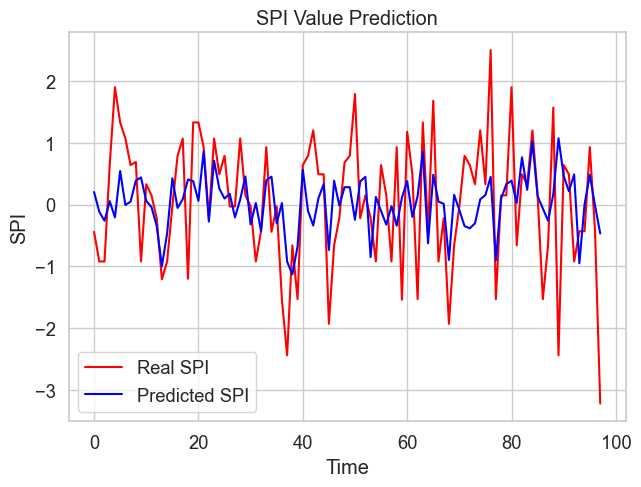

<Figure size 1600x400 with 0 Axes>

In [75]:
# Visualizing the results for GRU
plot_predictions(y_test,GRU_predicted_spi)

In [76]:
# Evaluating GRU
return_rmse(y_test,GRU_predicted_spi)

The root mean squared error is 0.9725157095058594.
The MSE is 0.9457868052356851
The MAE is 0.7537353904408461
The R2_Score is 0.1519603198340692


In [77]:
evaluation_metrics = calculate_evaluation_metrics(y_test, GRU_predicted_spi)
print(evaluation_metrics)

{'ME': 0.012864742347476456, 'MAE': 0.7537353904408461, 'MSE': 0.9457868052356851, 'RMSE': 0.9725157095058594, 'NRMSE': 0.1700202289345908, 'PBIAS': 29.804840426777517, 'RSR': 0.9208906993590124, 'rSD': 1.0844569900681258, 'NSE': -114.26714530970312, 'mNSE': -114.26714530970312, 'rNSE': -102.45762874410882, 'd': 0.30449235028025423, 'md': 0.30449235028025423, 'rd': 0.30449235028025423, 'cp': 0.30449235028025423, 'r': 0.30449235028025423, 'R2': 0.1519603198340692}
